In [ ]:
We are generating a tremendous amount of data daily.
-Facebook collects data of what you like, share, post, places you visit, restaurants you like, etc.
-Your smartphone apps collect a lot of personal information about you
-Amazon collects data of what you buy, view, click, etc. on their site
-Casinos keep a track of every move each customer makes.

As data generation and collection keeps increasing, visualizing it and drawing inferences becomes 
more and more challenging. In such cases where we have a large number of variables, it is better 
to select a subset of these variables (p<<100) which captures as much information as the original set of variables.
we can reduce p dimensions of the data into a subset of k dimensions (k<<p). This is called dimensionality reduction.

In [ ]:
Why it is required : 
    
-Space required to store the data is reduced as the number of dimensions.
-Less dimensions lead to less computation/training time.
-Some algorithms do not perform well when we have a large dimensions. 
 So reducing these dimensions needs to happen for the algorithm to be useful.
-It takes care of multicollinearity by removing redundant features. 
-It helps in visualizing data.

In [ ]:
Common Dimensionality Reduction Techniques :
    
1 Missing Value Ratio
2 Low Variance Filter
3 High Correlation Filter
4 Random Forest
5 Backward Feature Elimination
6 Forward Feature Selection
7 Factor Analysis
8 Principal Component Analysis
9 Independent Component Analysis
10 Methods Based on Projections
11 t-Distributed Stochastic Neighbor Embedding (t-SNE)
12 UMAP

### Dimensionality Reduction Techniques 

### 1.Missing Value Ratio :

In [ ]:
Before building model. While exploring the data, you find that your dataset has some missing values. 
You will try to find out the reason for these missing values and then impute them or drop the variables
entirely which have missing values (using appropriate methods). 
What if we have too many missing values (say more than 50%).
Should we impute the missing values or drop the variable. We can set a threshold value and 
if the percentage of missing values in any variable is more than that threshold, we will drop the variable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### The dataset downloaded from Kaggle : https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

In [4]:
train = pd.read_csv('Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.isnull().sum() / len(train) *100       # check the percentage of missing values in each variable. 

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [6]:
# saving missing values in 'a' variable
a = train.isnull().sum()/len(train)*100     # check the percentage of missing values in each variable.

# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:        # setting the threshold as 20%
        variable.append(variables[i])
        
# variables to be used are stored in “variable”, which contains only those features where the missing values are less than 20%.

## -----------------------------------------------

### 2.Low Variance Filter

In [ ]:
we need to calculate the variance of each variable we are given. 
Then drop the variables having low variance as compared to other variables in our dataset.
The reason for this is that variables with a low variance will not affect the target variable.

In [10]:
# first impute the missing values 

train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

# check all the missing values have been filled:
train.isnull().sum()/len(train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [11]:
# calculate the variance of all the numerical variables.

train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

##### The variance of 'Item_Visibility' is very less as compared to the other variables. We can safely drop this column. This is how we apply low variance filter.

In [30]:
numeric = train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]                                    # list of variables that have a variance greater than 10.
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
        variable.append(numeric[i])      # numeric[i+1]

## ------------------------------------

### 3. High Correlation filter

In [ ]:
High correlation between two variables means they have similar trends and are likely
to carry similar information. This can bring down the performance of some models 
(linear and logistic regression models).
We can calculate the correlation between independent numerical variables. 
If the correlation coefficient crosses a certain threshold value, we can drop one of the variables 
(dropping a variable is highly subjective and should always be done keeping the domain in mind).

->we should keep those variables which show a decent or high correlation with the target variable.

In [32]:
df=train.drop('Item_Outlet_Sales', axis=1)     # 1st drop the dependent variable (Item_Outlet_Sales)
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


#### Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we consider dropping one of those variables.

## ---------------------------------------------

### 4.Random Forest

In [ ]:
Random Forest is one of the most widely used algorithms for feature selection. 
It comes with in-built feature importance. This helps us select a smaller subset of features.
We need to convert the data into numeric form by applying one hot encoding, as Random Forest takes only numeric inputs.

In [36]:
from sklearn.ensemble import RandomForestRegressor

df=df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)    # no importance so dropping

model = RandomForestRegressor(random_state=1, max_depth=10)

df=pd.get_dummies(df)

model.fit(df,train.Item_Outlet_Sales)   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

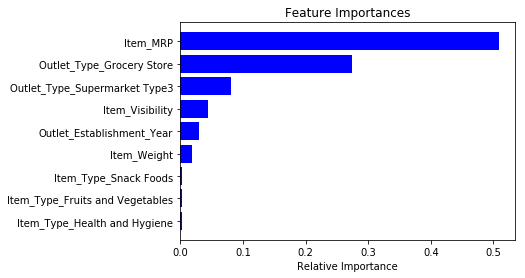

In [43]:
# After fitting the model, plot the feature importance graph

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### we can pick the top-most features to reduce the dimensionality in our dataset  or  we can use the 'SelectFromModel' of sklearn to do so. It selects the features based on the importance of their weights.

In [44]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(df, train.Item_Outlet_Sales)

## ----------------------------------

### 5.Backward Feature Elimination

In [ ]:
Steps : 
-We first take all the n variables present in our dataset and train the model using them.
-We then calculate the performance of the model.
-Now, we compute the performance of the model after eliminating each variable (n times),
 i.e., we drop one variable every time   and train the model on the remaining n-1 variables.
-We identify the variable whose removal has produced the smallest or no change in the
 performance of the model, and then drop that variable.
-Repeat this process until no variable can be dropped.
-This method can be used when building Linear Regression or Logistic Regression models.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets

lreg = LinearRegression()

rfe = RFE(lreg, 10)

rfe = rfe.fit_transform(df, train.Item_Outlet_Sales)

##### We need to specify the algorithm and number of features to select, and we get back the list of variables obtained from backward feature elimination.

## -------------------------------------

### 6.Forward Feature Selection

In [ ]:
Instead of eliminating features, we try to find the best features which improve the performance of the model. 

Steps :
-start with a single feature, train the model n number of times using each feature separately.
-The variable giving the best performance is selected as the starting variable.
-Then we repeat this process and add one variable at a time. 
-The variable that produces the highest increase in performance is retained.
-We repeat this process until no significant improvement is seen in the model’s performance.

In [55]:
from sklearn.feature_selection import f_regression

ffs = f_regression(df,train.Item_Outlet_Sales )

In [56]:
# This returns an array containing the F-values of the variables and the p-values corresponding to each F value.
# For our purpose, we will select the variables having F-value greater than 10

variable = [ ]
for i in range(0,len(df.columns)-1):
    if ffs[0][i] >=10:
        variable.append(df.columns[i])

##### Both  'Backward Feature Elimination'  and  'Forward Feature Selection'  are time consuming and computationally expensive. They are practically only used on datasets that have a small number of input variables.

## -----------------------------------------------

## PCA

In [ ]:
PCA :
is not a ML algo. But it is a technique reducing the Dimensionality. 
(Its an Unsupervised learning algo.)
suppose a dataset has 3 independent features and if we want to convert 3 into 2 independent features
by using a new vector space and that time we use PCA. 
We can use PCA to reduce any no. of independent features we want.
                  
PCA is a linear algorithm. It will not be able to interpret complex polynomial relationship between features.
On the other hand, t-SNE is based on probability distributions with random walk on neighborhood graphs to find
the structure within the data.

After creating DF
While running a PCA , the 1st thing you have to do is : Standard Scaling (bcoz difference b/w values is very high) 
and if we create a new vector space the values should be very minimal. (Scaling on idependent features like: X)
2nd apply PCA tech.
Now when dimensions reduced we can apply any algo. (Logistic Reg., Decision Tree)  , for target output. 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer           # using sklearn 'breast_cancer' dataset

cancer = load_breast_cancer()

In [2]:
cancer.keys()
# print(cancer['DESCR'])  # gives data description

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer.data.shape    # You can see we have 30 independent features (also can check using ['DESCR']) we reduce to 2 dimensional
                     # we see how well new dimensions will be created by considering all these features and not lose data

(569, 30)

In [4]:
cancer.target_names    # we have 2 type of o/p  and we have 0 , 1 for this

array(['malignant', 'benign'], dtype='<U9')

In [6]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])       # creating a DF (data, column names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### After creating DF While running a PCA , the 1st thing to do is : Standard Scaling (bcoz difference b/w values is very high)  and if we create a new vector space the values should be very minimal.   2nd apply PCA tech.

In [7]:
from sklearn.preprocessing import StandardScaler     # we can also use : MinMaxScaler

scaler = StandardScaler()
scaler.fit(df)

scaled_data = scaler.transform(df)   # to finish the scaling we do transform the data
# scaled_data                         # based on stdev=1  , mean=0 

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # We converting 30 dimension into 2 dimension what we pass (bcoz many dimensions make overfitting) 

pca.fit(scaled_data)      # Now we fit scaled data

pca_transform = pca.transform(scaled_data)     # transforming it

In [23]:
pca.n_components

2

In [24]:
pca.explained_variance_ratio_          # [1st component variance, 2nd component variance]

array([0.44272026, 0.18971182])

In [9]:
print('Before PCA :',scaled_data.shape)              # You can check here shape of matrix what dimensions we have  30 or 2

print('After applying PCA :',pca_transform.shape)    

Before PCA : (569, 30)
After applying PCA : (569, 2)


#### Now when dimensions reduced we can apply any algo. (Logistic Reg., Decision Tree)  , for target output. 

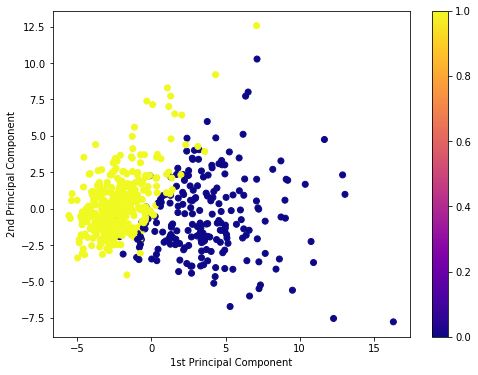

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(pca_transform[:,0], pca_transform[:,1], c=cancer['target'], cmap='plasma')  # 2 independent feature based on'target'

plt.colorbar()   # shows the side colorbar
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## t-SNE

In [ ]:
(t-SNE) t-Distributed Stochastic Neighbor Embedding : 
    
-is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. 
 It maps multi-dimensional data to two or more dimensions suitable for human observation.

-t-SNE can be used in the process of classification and clustering by using its output 
 as the input feature for other classification algorithms.
    
-t-SNE can be used on almost all high dimensional data sets. But it is extensively applied in Image processing,
 NLP, genomic data and speech processing. It has been utilized for improving the analysis of brain and heart scans.

#### Using above the same cancer data from 'PCA' the Standard Scaling "scaled_data" step , Here just applying 't-sne' technique. 

In [17]:
from sklearn.manifold import TSNE 

tsne = TSNE(n_components=2, n_iter=300)
tsne_result = tsne.fit_transform(scaled_data)               # 'scaled_data'

In [18]:
tsne_result

array([[-15.224786  ,  -3.0958157 ],
       [ -9.429821  ,   3.5247943 ],
       [-13.550294  ,  -0.38295937],
       ...,
       [ -5.6853266 ,   4.017497  ],
       [-15.190638  ,  -1.8406987 ],
       [ 13.777394  ,   8.967466  ]], dtype=float32)

In [19]:
print('Before t-sne :',scaled_data.shape)              # You can check here shape of matrix what dimensions we have  30 or 2

print('After applying t-sne :', tsne_result.shape)    

Before t-sne : (569, 30)
After applying t-sne : (569, 2)


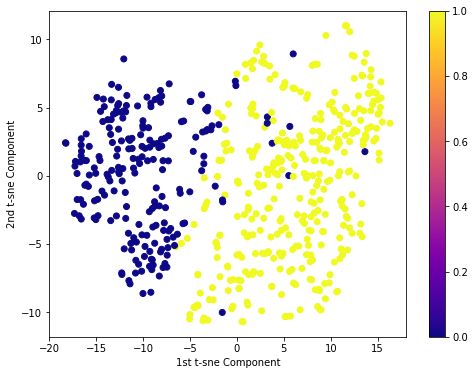

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=cancer['target'], cmap='plasma')   # 2 independent feature based on'target'

plt.colorbar()   # shows the side colorbar
plt.xlabel('1st t-sne Component')
plt.ylabel('2nd t-sne Component')
plt.show()

## --------------------------------------------------------------------------------

## when to use each Dimensionality Reduction Technique

<img src='dr1.png'>

In [ ]:
1.Missing Value Ratio :
If the dataset has too many missing values, we use this approach to reduce the number of variables.
We can drop the variables having a large number of missing values in them

2.Low Variance filter :
We apply this approach to identify and drop constant variables from the dataset.
The target variable is not unduly affected by variables with low variance, 
and hence these variables can be safely dropped.

3.High Correlation filter :
A pair of variables having high correlation increases multicollinearity in the dataset. 
So, we can use this technique to find highly correlated features and drop them accordingly.

4.Random Forest : 
This is one of the most commonly used techniques which tells us the importance of each feature present in the
dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction.

5. & 6. Both 'Backward Feature Elimination' and 'Forward Feature Selection' :
techniques take a lot of computational time and are thus generally used on smaller datasets

7.Factor Analysis : 
This technique is best suited for situations where we have highly correlated set of variables. 
It divides the variables based on their correlation into different groups, and represents each group with a factor.
        
8.Principal Component Analysis :
This is one of the most widely used techniques for dealing with linear data. 
It divides the data into a set of components which try to explain as much variance as possible.

9.Independent Component Analysis :
We can use ICA to transform the data into independent components which describe the data using less number of components.
        
10.ISOMAP : 
We use this technique when the data is strongly non-linear.
    
11.t-SNE : 
This technique also works well when the data is strongly non-linear. It works extremely well for visualizations. 
    
12.UMAP : 
This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE. 